In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

In [129]:
car_data = pd.read_csv("car data.csv")

In [130]:
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [131]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [132]:
car_data["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [133]:
car_data = car_data[car_data["Owner"]<3]

In [134]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0


In [135]:
car_data["Car_Name"].value_counts()

Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
Bajaj Avenger 220             3
Royal Enfield Thunder 500     3
creta                         3
xcent                         3
etios cross                   3
etios g                       3
TVS Apache RTR 160            3

In [136]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2013.653333,4.668500,7.574800,36597.030000,0.033333
std,2.862482,5.089765,8.606631,38473.551916,0.179805
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.875000,1.200000,15000.000000,0.000000
50%,2014.000000,3.625000,6.250000,32000.000000,0.000000
75%,2016.000000,6.000000,9.862500,48191.750000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000


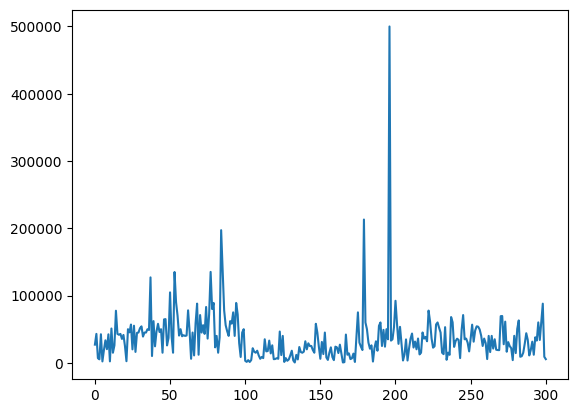

In [137]:
plt.plot(car_data["Driven_kms"])

In [138]:
car_data[car_data["Driven_kms"]>100000]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


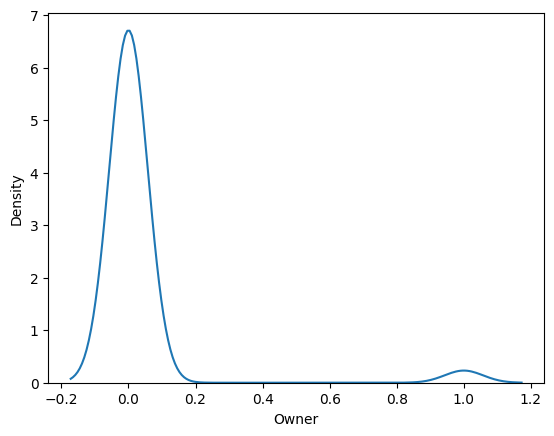

In [139]:
sns.kdeplot(data=car_data, x=car_data["Owner"]);

In [140]:
car_data["Z_Score"]=stats.zscore(car_data["Owner"])

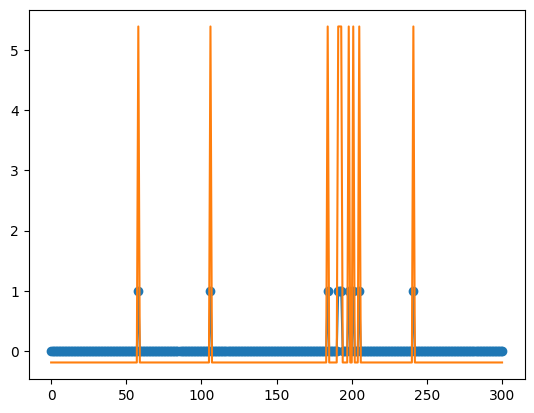

In [141]:
plt.plot(car_data["Owner"],marker='o');
plt.plot(car_data["Z_Score"]);
plt.show()

In [142]:
print("Z-Score above 3 owner sum:",car_data[car_data["Z_Score"]>3]["Owner"].sum(),"\nZ-Score above 2 owner sum:",car_data[car_data["Z_Score"]>2]["Owner"].sum(),"\nZ-Score above 1 owner sum:",car_data[car_data["Z_Score"]>1]["Owner"].sum())

Z-Score above 3 owner sum: 10 
Z-Score above 2 owner sum: 10 
Z-Score above 1 owner sum: 10


Note : The above results are showing total number of owner of value 1.

In [143]:
car_data.drop('Z_Score',axis=1,inplace=True)

In [144]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [145]:
car_data.drop('Car_Name',inplace=True,axis=1)

In [146]:
car_data_dummies = pd.get_dummies(car_data[["Fuel_Type","Transmission"]])

In [147]:
car_data_dummies.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,False,False,True,False,True
1,False,True,False,False,True
2,False,False,True,False,True
3,False,False,True,False,True
4,False,True,False,False,True


In [148]:
car_data_dummies[["Year","Selling_Price","Present_Price","Driven_kms","Owner"]] = car_data[["Year","Selling_Price","Present_Price","Driven_kms","Owner"]]

In [149]:
car_data_dummies.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,False,False,True,False,True,2014,3.35,5.59,27000,0
1,False,True,False,False,True,2013,4.75,9.54,43000,0
2,False,False,True,False,True,2017,7.25,9.85,6900,0
3,False,False,True,False,True,2011,2.85,4.15,5200,0
4,False,True,False,False,True,2014,4.60,6.87,42450,0


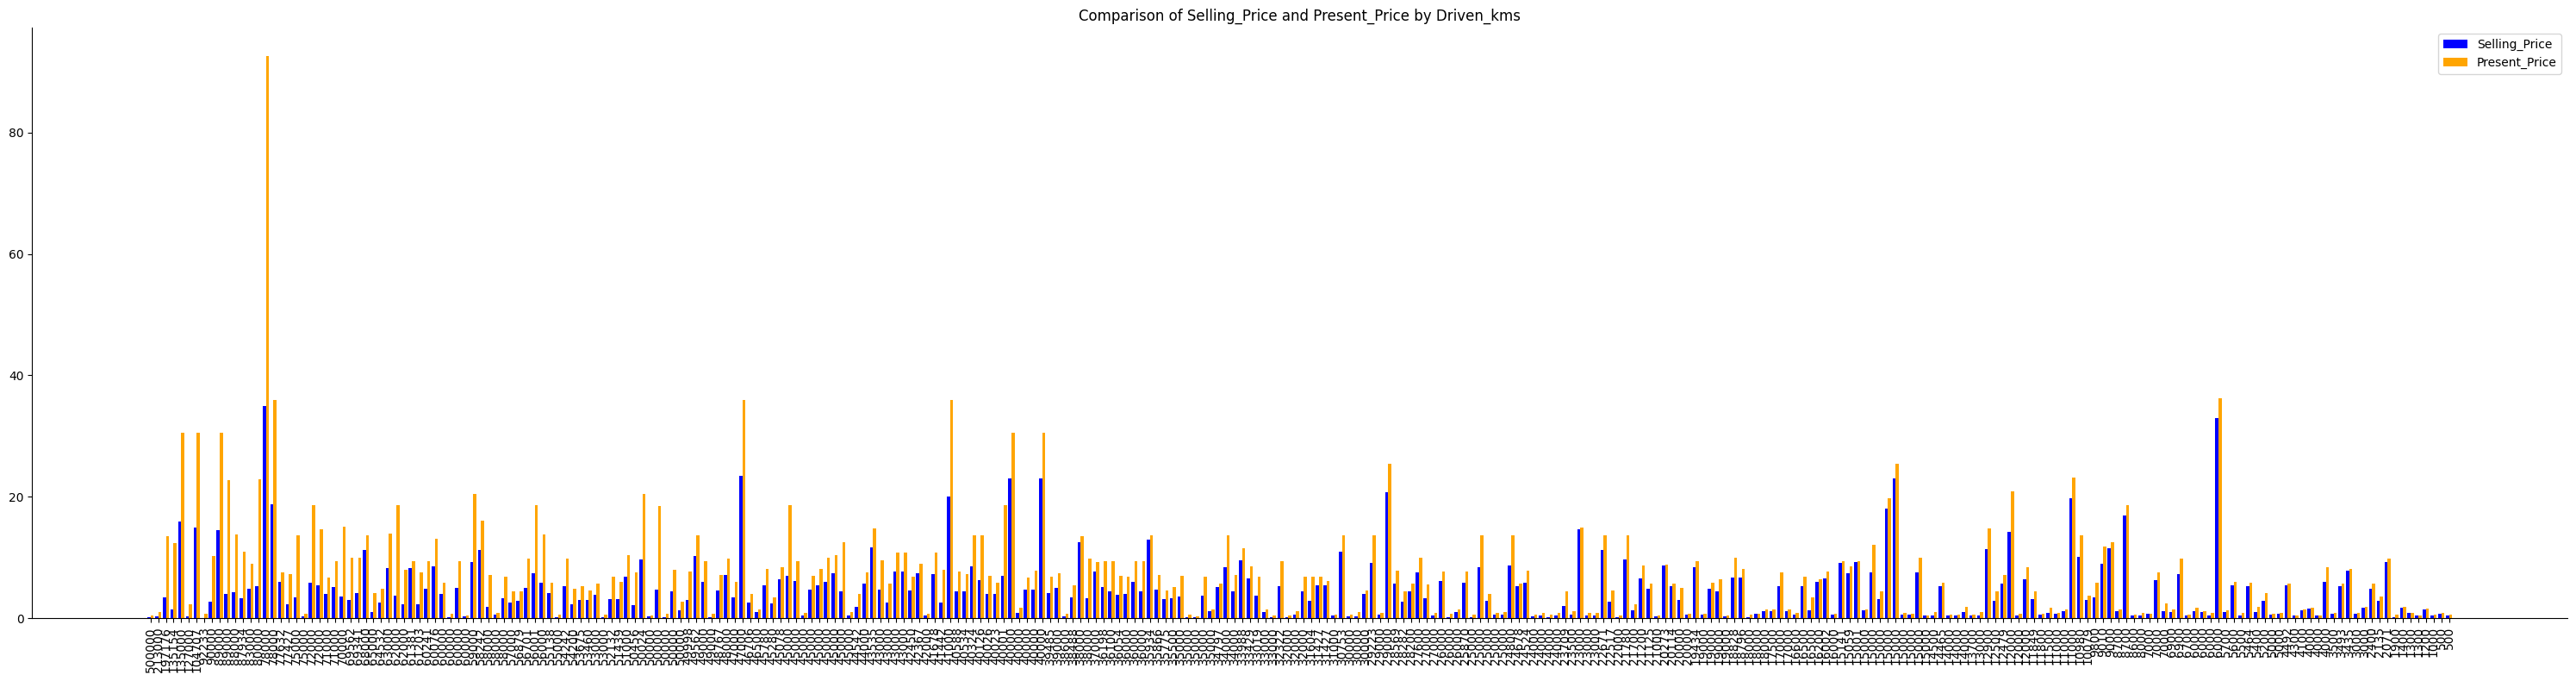

In [150]:
# Create an array of the indices
indices = np.arange(len(car_data_dummies))
car_data_dummies.sort_values('Driven_kms',ascending=False,inplace=True)
# Width of a bar
width = 0.4

# Set the figure size
plt.figure(figsize=(30, 8))

# Plotting Selling_Price bars
plt.bar(indices - width/2, car_data_dummies["Selling_Price"].values, width=width, color='blue', label='Selling_Price')

# Plotting Present_Price bars, offsetting them slightly for visibility
plt.bar(indices + width/2, car_data_dummies["Present_Price"].values, width=width, color='orange', label='Present_Price')

plt.legend(loc='upper right')
plt.xticks(indices, car_data_dummies["Driven_kms"].values, rotation=90)
plt.title('Comparison of Selling_Price and Present_Price by Driven_kms')

sns.despine()
plt.tight_layout()
plt.show()


In [151]:
X =car_data_dummies.drop('Selling_Price',axis=1)
y=car_data_dummies["Selling_Price"]

In [152]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X,y,test_size=0.3)
model = LinearRegression()
model.fit(X1_train,Y1_train)

LinearRegression()

In [153]:
prediction= model.predict(X1_test)
Linear = r2_score(Y1_test,prediction)
print(Linear)

0.7739990751868524


In [154]:
AdaBoost = AdaBoostRegressor(base_estimator=model,n_estimators=300,learning_rate=0.0001)
ensemble_model = AdaBoost.fit(X1_train,Y1_train)
prediction= ensemble_model.predict(X1_test)
r2_score(Y1_test,prediction)

0.7609424946217327

In [155]:
np.random.seed(42)
max_val=[]
for i in range(0,501,50):
    AdaBoost = AdaBoostRegressor(base_estimator=model,n_estimators=i+1,learning_rate=0.001)
    ensemble_model = AdaBoost.fit(X1_train,Y1_train)
    prediction= ensemble_model.predict(X1_test)
    max_val.append(r2_score(Y1_test,prediction))
    print("r2 Score at ",i,"estimators:",r2_score(Y1_test,prediction))

r2 Score at  0 estimators: 0.708134230053891
r2 Score at  50 estimators: 0.7474267191112574
r2 Score at  100 estimators: 0.7676497729838981
r2 Score at  150 estimators: 0.7660417452813192
r2 Score at  200 estimators: 0.7637189720123227
r2 Score at  250 estimators: 0.7691137313982457
r2 Score at  300 estimators: 0.7630246375777846
r2 Score at  350 estimators: 0.7635739758532438
r2 Score at  400 estimators: 0.7698612499921913
r2 Score at  450 estimators: 0.7708876118668351
r2 Score at  500 estimators: 0.7670567499304444


In [156]:
n_estimator=pd.Series(max_val).idxmax()
n_estimator = (n_estimator+1)*50
n_estimator

500

In [157]:
np.random.seed(42)


AdaBoost = AdaBoostRegressor(base_estimator=model,n_estimators=n_estimator,learning_rate=0.0001)
ensemble_model = AdaBoost.fit(X1_train,Y1_train)
prediction= ensemble_model.predict(X1_test)
AdaBoost_Linear_regression = r2_score(Y1_test,prediction)
print(AdaBoost_Linear_regression)

0.7627473030829113


In [158]:
np.random.seed(42)
tree_model = RandomForestRegressor()
tree_model.fit(X1_train,Y1_train)

RandomForestRegressor()

In [159]:
np.random.seed(42)
prediction= tree_model.predict(X1_test)
tree_model_r2 = r2_score(Y1_test,prediction)
print(tree_model_r2)

0.9198368303144094


In [160]:
np.random.seed(42)
AdaBoost = AdaBoostRegressor(base_estimator=tree_model,n_estimators=100,learning_rate=0.001)
ensemble_model = AdaBoost.fit(X1_train,Y1_train)
prediction= ensemble_model.predict(X1_test)
AdaBoost_random_forest = r2_score(Y1_test,prediction)
print(AdaBoost_random_forest)

0.8957352592570657


In [161]:

np.random.seed(42)
xgb_model = XGBRegressor(n_estimator=300,learning_rate=0.1)
xgb_model.fit(X1_train,Y1_train)
prediction= xgb_model.predict(X1_test)
xgb = r2_score(Y1_test,prediction)
print(xgb)


0.9446023999017727


In [162]:
data = {'Model': ['Linear Regression', 'AdaBoost + Linear Regression', 'Random Forest', 'AdaBoost + Random Forest', 'XGBoost'],
       'r2_score': [Linear, AdaBoost_Linear_regression, tree_model_r2, AdaBoost_random_forest, xgb],
       'n_estimators': [0, n_estimator, 0, 100, 300],
       'learning_rate': [0, 0.0001, 0, 0.001, 0.1]}

df = pd.DataFrame(data)
df


,Model,r2_score,n_estimators,learning_rate
0,Linear Regression,0.773999,0,0.0000
1,AdaBoost + Linear Regression,0.762747,500,0.0001
2,Random Forest,0.919837,0,0.0000
3,AdaBoost + Random Forest,0.895735,100,0.0010
4,XGBoost,0.944602,300,0.1000
